In [11]:
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Importing data
filename = '5_spins-15_steps-30_trajectories-dt=0.5.json'
with open(filename, 'r') as file:
    data = json.load(file)
    
parameters = data['Parameters']
expvals = data['Expectation values']

# Interaction edges and number of steps
num_spins = parameters['num_spins']
num_pairs = len(expvals['step 0'])-num_spins
num_steps = parameters['num_steps']

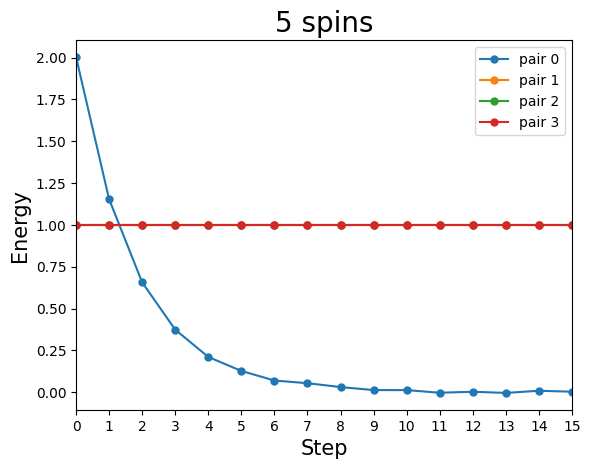

In [13]:
# Plotting steps X pair energies
pair_energies = { f'pair {i}': [] for i in list(range(num_pairs)) }

# Energy per spin pair
for pair in range(num_pairs):
    for step in range(num_steps+1):
        pair_energies[f'pair {pair}'].append(expvals[f'step {step}'][pair])

# Magnetic energy for each spin
magnetic_energies = { f'spin {i}': [] for i in list(range(num_spins)) }
for spin in range(num_spins):
    for step in range(num_steps+1):
        magnetic_energies[f'spin {spin}'].append(expvals[f'step {step}'][-num_spins+spin])

# Adding magnetic energy of each pair
for pair in range(num_pairs):
    for step in range(num_steps+1):
        pair_energies[f'pair {pair}'][step] += magnetic_energies[f'spin {pair}'][step] + magnetic_energies[f'spin {pair+1}'][step]

# Plotting steps X energy
fig, ax = plt.subplots()

for pair in range(num_pairs):
    ax.plot(list(range(num_steps+1)), pair_energies[f'pair {pair}'], label=f'pair {pair}', marker='.', markersize=10)

ax.set_title(f'{num_spins} spins', fontsize=20)
ax.set_xlabel('Step', fontsize=15)
ax.set_ylabel('Energy', fontsize=15)
ax.set_xlim(0, num_steps)
ax.set_xticks(list(range(num_steps+1)))
plt.legend()

plt.savefig(filename + '.png')
plt.show()